In [12]:
!pip install torch torchvision

In [13]:
!pip install streamlit

In [14]:
! pip install streamlit_option_menu

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
#Load the dataset
df = pd.read_csv('/content/Copper_Set.csv')
df.shape

(181673, 14)

In [17]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [18]:
df['product_ref']

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181668     164141591
181669     164141591
181670     164141591
181671     164141591
181672     164141591
Name: product_ref, Length: 181673, dtype: int64

In [19]:

df.columns


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [20]:
df.dtypes


id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [21]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [22]:
df.describe()


,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [23]:
df.tail(20)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181653,497F5391-F450-4B49-870D-9B62A0274DD6,2020-07-02,50.646907,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,2020-07-02,3.769829,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,2020-07-02,220.875272,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,766.0
181656,A020C0C8-B478-4EC0-9769-9FA2618E33DE,2020-07-02,9.754097,30155929.0,25.0,Won,W,41.0,0.70,1220.0,NaN,611993,2020-07-01,757.0
181657,F4B8B394-9363-4B26-8155-6D960C7E188E,2020-07-02,3.209977,30196884.0,84.0,Won,W,10.0,1.00,1500.0,5021312515000012,1668701376,2020-07-01,711.0
181658,7A886460-D6DD-4F7A-9949-D16F410FF9F0,2020-07-02,509.314916,30200854.0,25.0,Won,W,41.0,0.71,1220.0,1000219,164141591,2020-07-01,616.0
181659,A6CD092E-1E39-4FF5-9616-DD4233435DAD,2020-07-02,707.279961,30200854.0,25.0,Won,W,41.0,0.71,1500.0,1000225,164141591,2020-07-01,617.0
181660,8A72A6C0-C057-45FE-9B53-6A0E81F327AE,2020-07-02,704.749162,30200854.0,25.0,Won,W,41.0,0.84,1500.0,1000226,164141591,2020-07-01,599.0
181661,802C8D24-710A-4A96-B3B1-F33F383EC455,2020-07-02,-18.000000,30200854.0,25.0,Won,W,41.0,0.84,1220.0,1000776,164141591,2020-07-01,590.0
181662,95DA5A57-10FA-4D8B-90F1-0AA441F82849,2020-07-02,76.859457,30200854.0,25.0,Won,W,41.0,1.18,1500.0,1000228,164141591,2020-07-01,591.0


In [24]:
df['quantity tons']

0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671   -2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [26]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data.
df['material_ref'].fillna('unknown', inplace=True)

In [27]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [28]:
# deleting null values.
df = df.dropna()

In [29]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [30]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.isnull().sum()



id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [31]:
df = df.dropna()
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [32]:
df1 = df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [33]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

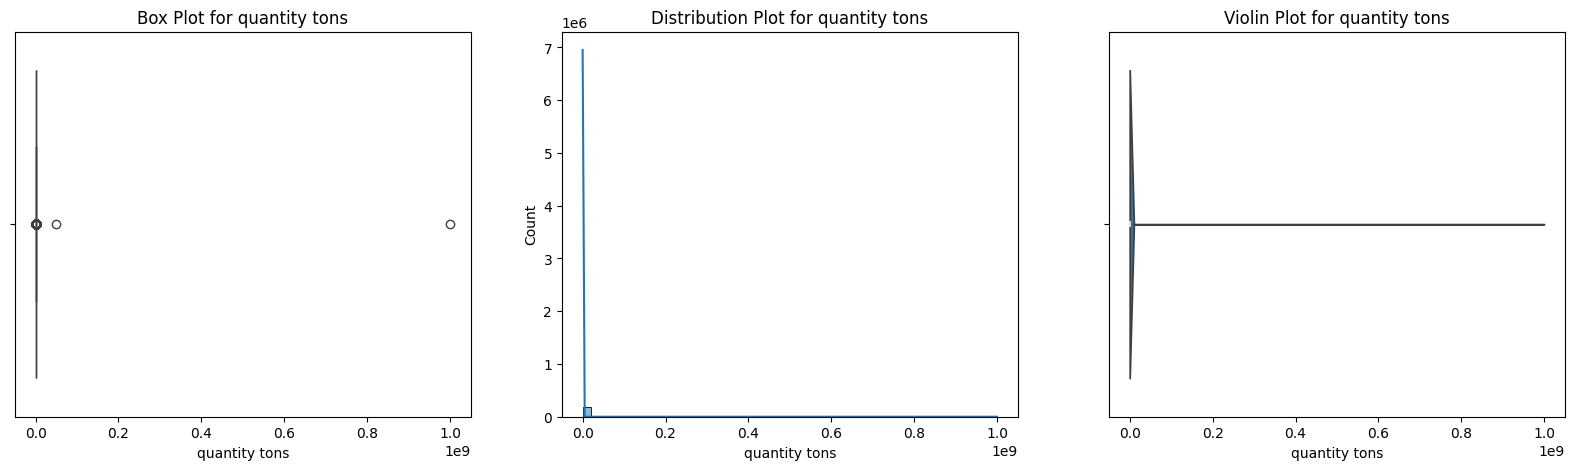

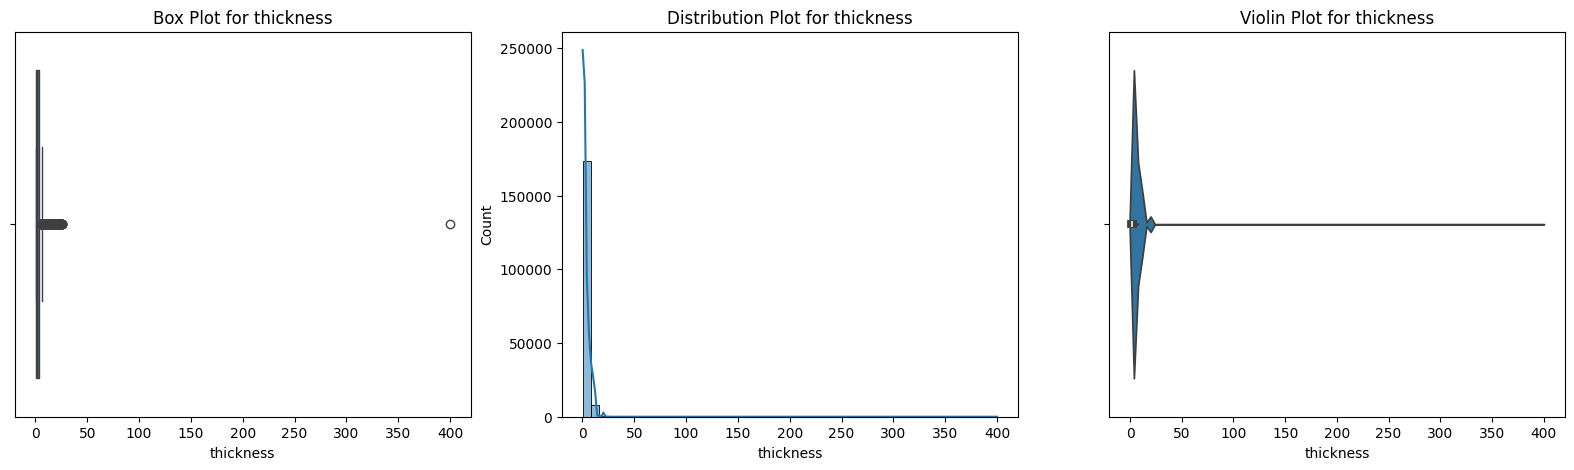

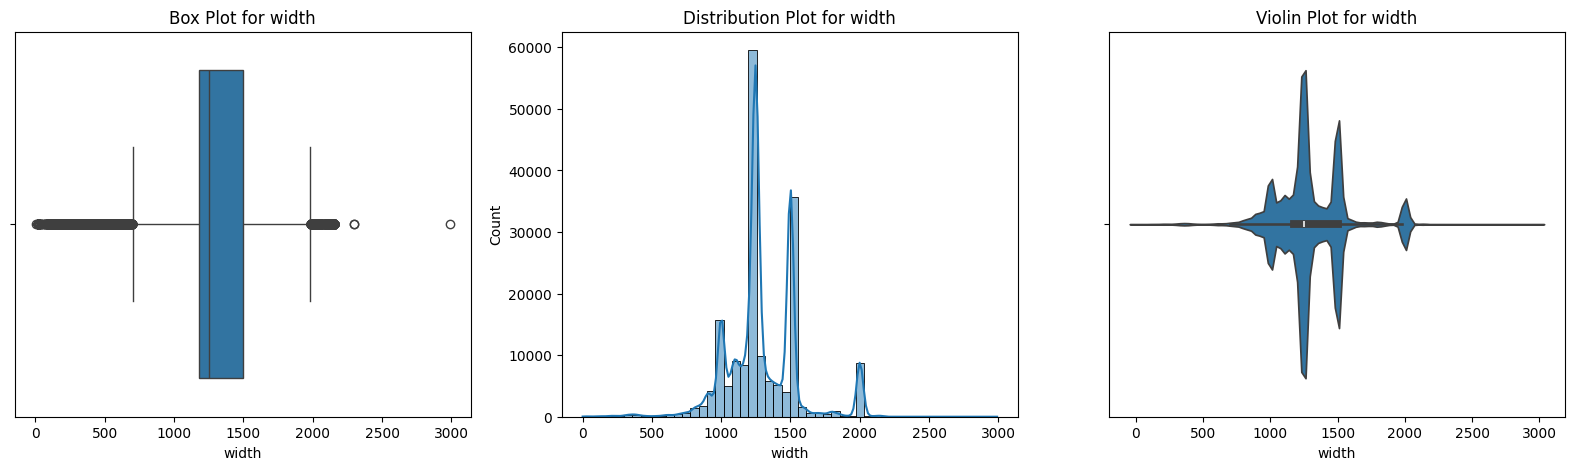

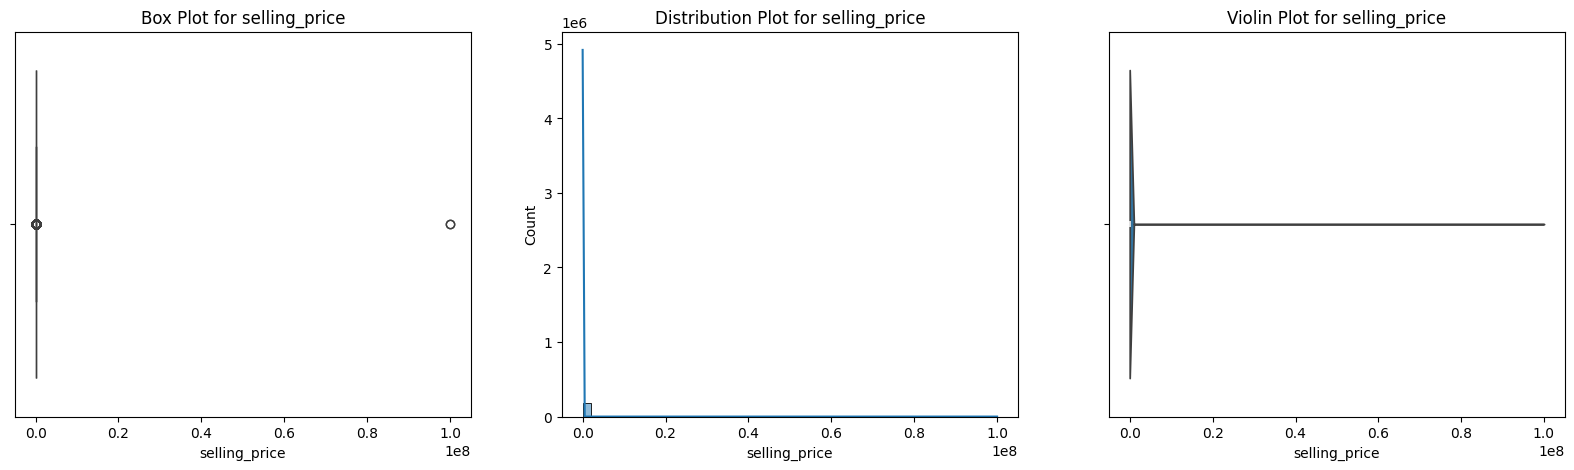

In [34]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [35]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data


df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


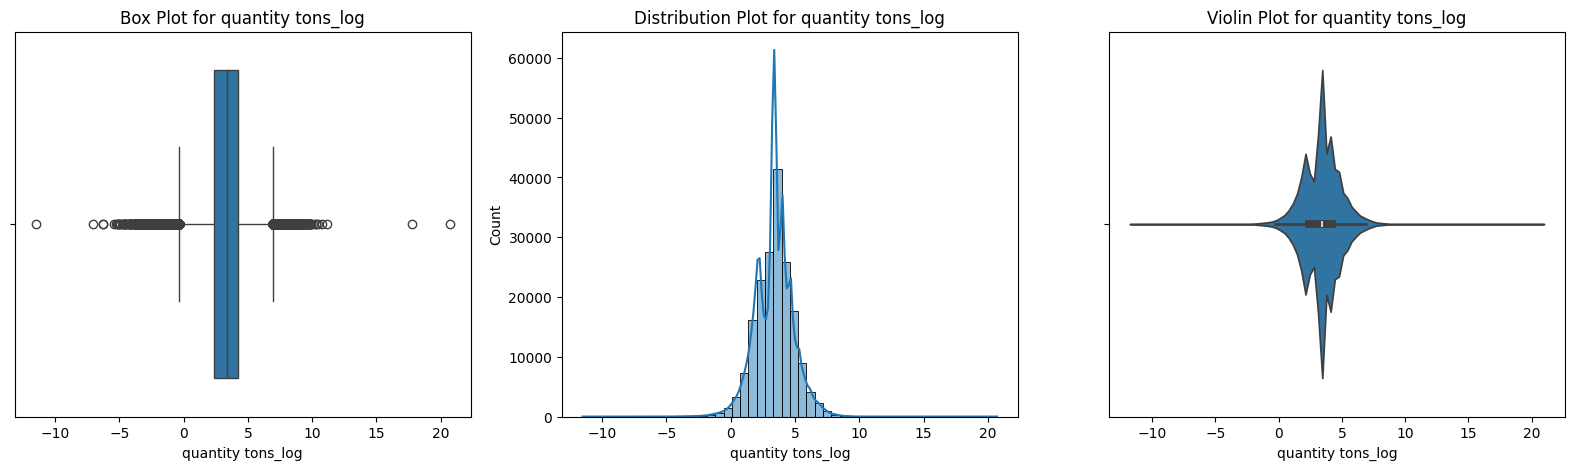

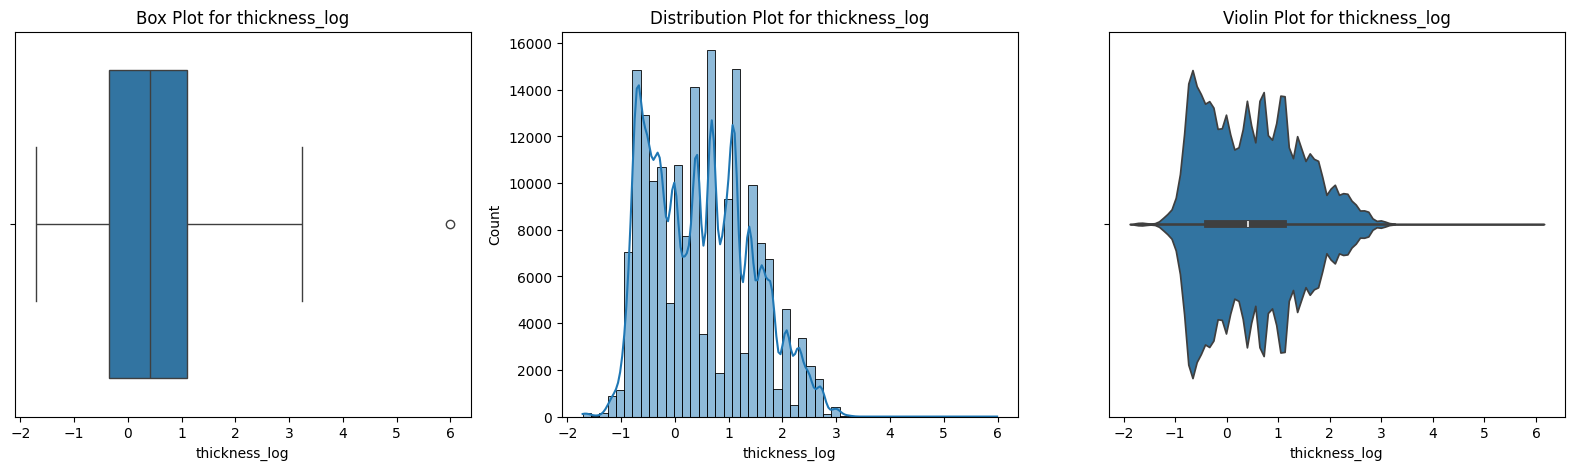

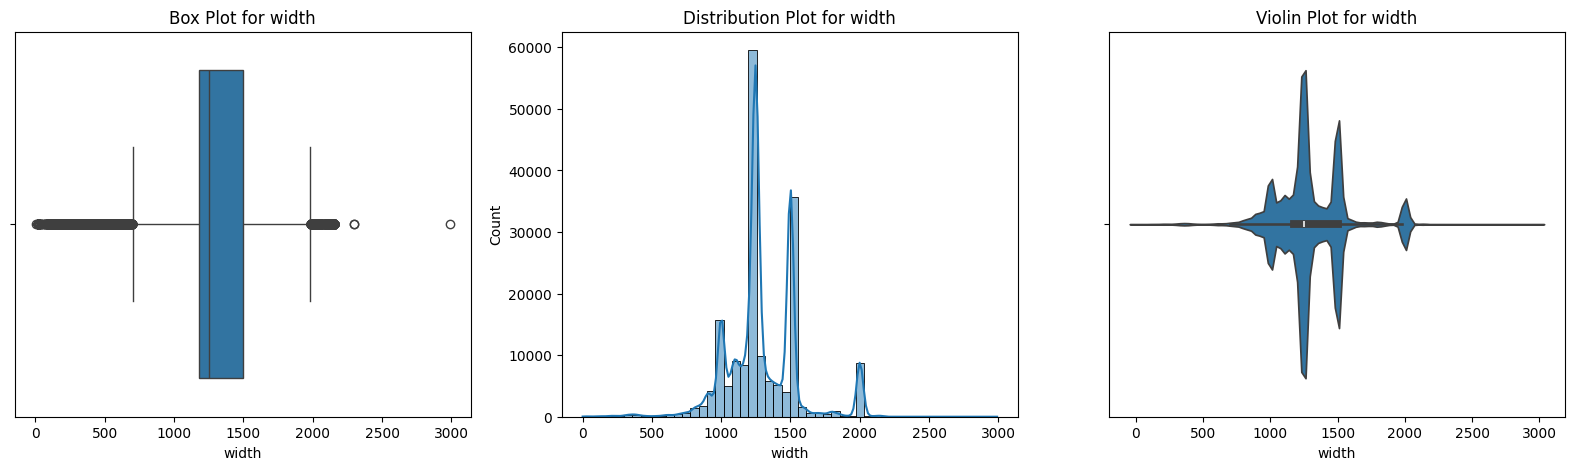

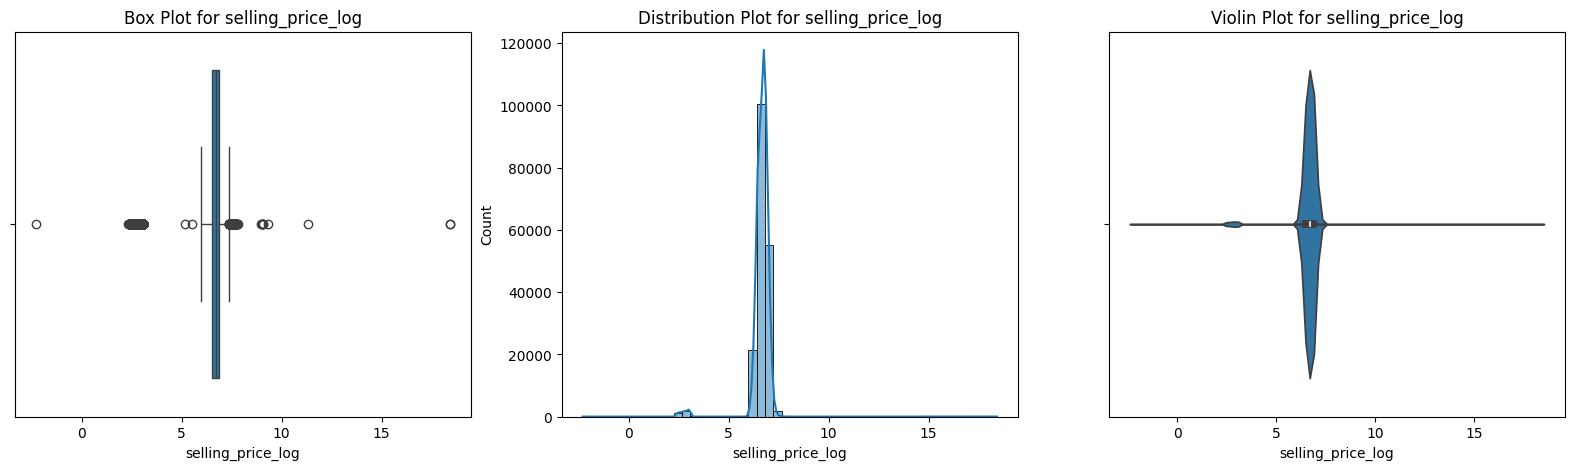

In [36]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [37]:
#Use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df1['status_en'] = OE.fit_transform(df1[['status']])
df1['item_type_en'] = OE.fit_transform(df1[['item type']])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [38]:
df1.columns


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'thickness_log', 'selling_price_log', 'status_en', 'item_type_en'],
      dtype='object')

In [41]:
item_type_mapping = pd.DataFrame({
    'item type': df1['item type'].unique(),
    'item type_en': df1['item_type_en'].unique()
})

item_type_mapping

,item type,item type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [42]:
status_mapping = pd.DataFrame({
    'status': df1['status'].unique(),
    'status_en': df1['status_en'].unique()
})

status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


In [44]:
X=df1[['quantity tons_log','status_en','item_type_en','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

In [45]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181667    6.400257
181668    6.381816
181669    6.378426
181670    6.428105
181672    6.408529
Name: selling_price_log, Length: 181620, dtype: float64

In [46]:
X

,quantity tons_log,status_en,item_type_en,application,thickness_log,width,country,customer,product_ref
0,3.991779,7.0,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778
1,6.643822,7.0,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718
2,5.956169,7.0,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377
3,5.310301,7.0,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718
4,6.666354,7.0,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
181667,4.670802,7.0,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,164141591
181668,4.629691,7.0,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591
181669,5.337954,7.0,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591
181670,1.443523,7.0,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [48]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.08464529095644657


In [50]:
from sklearn.metrics import mean_squared_error, r2_score


In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.034970394733047055
R-squared: 0.8920878465427603


In [52]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.02076353424573722
R-squared: 0.9359275835761944


In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.033258562824546305
R-squared: 0.8973702423811053


In [54]:
from sklearn.tree import ExtraTreeRegressor

etr = ExtraTreeRegressor()
etr.fit(X_train, y_train)

y_pred = etr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.04033793243335728
R-squared: 0.8755246205218646


LinearRegression model performs well

In [55]:
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                        new_thickness_log, new_width, country, new_customer, new_product_ref]])

feature_names = ['quantity tons_log','status_en','item type_en','application','thickness_log',
                 'width','country','customer','product_ref']

# Make predictions using the trained RandomForestRegressor model
new_pred = lr.predict(new_sample)

# Display the predicted resale price
print("Selling Price:", new_pred)

Selling Price: [6.1852819]


In [56]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = lr.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 485.5498231791531


In [57]:
# Saving the model
import pickle
with open('Reg_model.pkl', 'wb') as file:
    pickle.dump(lr, file)




Classification

In [58]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [59]:
df2 = df1.copy()
df2.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [60]:
df3 = df2[df2['status'].isin(['Won', 'Lost'])]
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [61]:
df3["status"].value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [62]:
df3["status_encoded"] = df3['status'].map({"Won":1, "Lost":0})
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item_type_en,status_encoded
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0,1
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0,1


In [64]:
df4 = df3[['quantity tons_log','selling_price_log','item_type_en', 'application','thickness_log',
           'width','country','customer','product_ref','status_encoded']]
df4

,quantity tons_log,selling_price_log,item_type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665,1
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,6.400257,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,164141591,1
181668,4.629691,6.381816,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591,1
181669,5.337954,6.378426,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591,1
181670,1.443523,6.428105,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591,1


In [65]:
df4["status_encoded"].value_counts()

status_encoded
1    115996
0     34431
Name: count, dtype: int64

In [66]:
from imblearn.over_sampling import SMOTE

X = df4.drop(["status_encoded"], axis=1)
y = df4["status_encoded"]

In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)

In [68]:
y_res.value_counts()

status_encoded
1    115996
0    115996
Name: count, dtype: int64

In [69]:
y_res.shape

(231992,)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 9)
(69598, 9)
(162394,)
(69598,)


In [71]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32725  2286]
 [ 4400 30187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     35011
           1       0.93      0.87      0.90     34587

    accuracy                           0.90     69598
   macro avg       0.91      0.90      0.90     69598
weighted avg       0.91      0.90      0.90     69598



In [74]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32622  2389]
 [ 2574 32013]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     35011
           1       0.93      0.93      0.93     34587

    accuracy                           0.93     69598
   macro avg       0.93      0.93      0.93     69598
weighted avg       0.93      0.93      0.93     69598



In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[34042   969]
 [ 2081 32506]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     35011
           1       0.97      0.94      0.96     34587

    accuracy                           0.96     69598
   macro avg       0.96      0.96      0.96     69598
weighted avg       0.96      0.96      0.96     69598



In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[28260  6751]
 [ 8161 26426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     35011
           1       0.80      0.76      0.78     34587

    accuracy                           0.79     69598
   macro avg       0.79      0.79      0.79     69598
weighted avg       0.79      0.79      0.79     69598



RandomForestClassfier performs well, when compared to other model

In [77]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rfc.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [78]:
# Saving the model
import pickle
with open('classfier_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [88]:
%%writefile app.py








import streamlit as st
from streamlit_option_menu import option_menu
import numpy as np
import pickle

# -------------------------------This is the configuration page for our Streamlit Application---------------------------
st.set_page_config(
    page_title="Industrial Copper Modeling",

    layout="wide"
)

# -------------------------------This is the sidebar in a Streamlit application, helps in navigation--------------------
with st.sidebar:
    selected = option_menu("Main Menu", ["About Project", "Selling Price Prediction", "Status (Win/Lost)"],
                           icons=["house", "gear", "gear"],
                           styles={"nav-link": {"font": "sans serif", "font-size": "20px", "text-align": "centre"},
                                   "nav-link-selected": {"font": "sans serif", "background-color": "#0072b1"},
                                   "icon": {"font-size": "20px"}
                                   }
                           )

# -----------------------------------------------About Project Section--------------------------------------------------
if selected == "About Project":
    st.markdown("# :blue[Industrial Copper Modeling]")
    st.markdown('<div style="height: 50px;"></div>', unsafe_allow_html=True)
    st.markdown("### :blue[Technologies :] Python, Pandas, Numpy, Scikit-Learn, Streamlit, Python scripting, "
                "Machine Learning, Data Preprocessing, Visualization, EDA, Model Building, Data Wrangling, "
                "Model Deployment")
    st.markdown("### :blue[Overview :] This project aims to construct a machine learning model and implement "
                "it as a user-friendly online application in order to provide accurate predictions about the "
                "Selling price and status of the copper model. This prediction model will be based on past transactions.")

    # ------------------------------------------------Predictions Section---------------------------------------------------
if selected == "Selling Price Prediction":
    st.markdown("# :blue[Predicting Results based on Trained Model]")
    # -----New Data inputs from the user for predicting the selling price-----
    a1 = st.text_input("Quantity")
    b1 = st.text_input("Status")
    c1 = st.text_input("Item Type")
    d1 = st.text_input("Application")
    e1 = st.text_input("Thickness")
    f1 = st.text_input("Width")
    g1 = st.text_input("Country")
    h1 = st.text_input("Customer")
    i1 = st.text_input("Product Reference")

    with open(r"/content/Reg_model.pkl", 'rb') as file_1:
        regression_model = pickle.load(file_1)

    # -----Submit Button for PREDICT RESALE PRICE-----
    predict_button_1 = st.button("Predict Selling Price")

    if predict_button_1:

        a1 = float(a1)
        b1 = float(b1)
        c1 = float(c1)
        d1 = float(d1)
        e1 = float(e1)
        f1 = float(f1)
        g1 = float(g1)
        h1 = float(h1)
        i1 = float(i1)

        # -----Sending the user enter values for prediction to our model-----
        new_sample_1 = np.array(
                [[np.log(a1), b1, c1, d1, np.log(e1), f1, g1, h1, i1]])
        new_pred_1 = regression_model.predict(new_sample_1)[0]

        st.write('## :green[Predicted resale price:] ', np.exp(new_pred_1))

if selected == "Status (Win/Lost)":
    st.markdown("# :blue[Predicting Results based on Trained Model]")
    # -----New Data inputs from the user for predicting the status-----
    a2 = st.text_input("Quantity")
    b2 = st.text_input("Selling Price")
    c2 = st.text_input("Item Type")
    d2 = st.text_input("Application")
    e2 = st.text_input("Thickness")
    f2 = st.text_input("Width")
    g2 = st.text_input("Country")
    h2 = st.text_input("Customer")
    i2 = st.text_input("Product Reference")

    with open(r"/content/classfier_model.pkl", 'rb') as file_2:
        classification_model = pickle.load(file_2)

    # -----Submit Button for PREDICT RESALE PRICE-----
    predict_button_2 = st.button("Predict Status")

    if predict_button_2:

        a2 = float(a2)
        b2 = float(b2)
        c2 = float(c2)
        d2 = float(d2)
        e2 = float(e2)
        f2 = float(f2)
        g2 = float(g2)
        h2 = float(h2)
        i2 = float(i2)
        # -----Sending the user enter values for prediction to our model-----
        new_sample_2 = np.array(
                [[np.log(a2), np.log(b2), c2, d2, np.log(e2), f2, g2, h2, i2]])
        new_pred_2 = classification_model.predict(new_sample_2)

        if new_pred_2 ==1:
            st.write('## :green[The Status is: Won]')
        else:
            st.write('## :green[The Status is: Lost]')


Overwriting app.py


In [89]:
!wget -q -O - ipv4.icanhazip.com

34.132.84.249


In [90]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.024s
your url is: https://eleven-onions-stay.loca.lt
